In [3]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.model_selection import GridSearchCV

In [4]:
cols = open("/Users/saravindnaidu/Desktop/MuSigma /Problem statement 2 dataset/dictionary.txt","r",encoding="ISO-8859-1")
dict_cols=cols.readlines()

column_names=[]
for i in range(3,89):
    column_names.append(dict_cols[i].split(' ')[1])

In [5]:
train_df = pd.read_csv (r'/Users/saravindnaidu/Desktop/MuSigma /Problem statement 2 dataset/ticdata2000.txt', delimiter='\t', names = column_names)
test_df = pd.read_csv(r'/Users/saravindnaidu/Desktop/MuSigma /Problem statement 2 dataset/ticeval2000.txt', delimiter='\t', names = column_names[:-1])

targets_df = pd.read_csv (r'/Users/saravindnaidu/Desktop/MuSigma /Problem statement 2 dataset/tictgts2000.txt', delimiter='\t', names = ['target'])

print(train_df.shape, test_df.shape, targets_df.shape)

(5822, 86) (4000, 85) (4000, 1)


In [6]:
train_df

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.isna().sum()

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
CARAVAN     0
Length: 86, dtype: int64

In [42]:
train_df['CARAVAN'].value_counts(normalize=True)*100 

0    94.022673
1     5.977327
Name: CARAVAN, dtype: float64

# EDA

<AxesSubplot:>

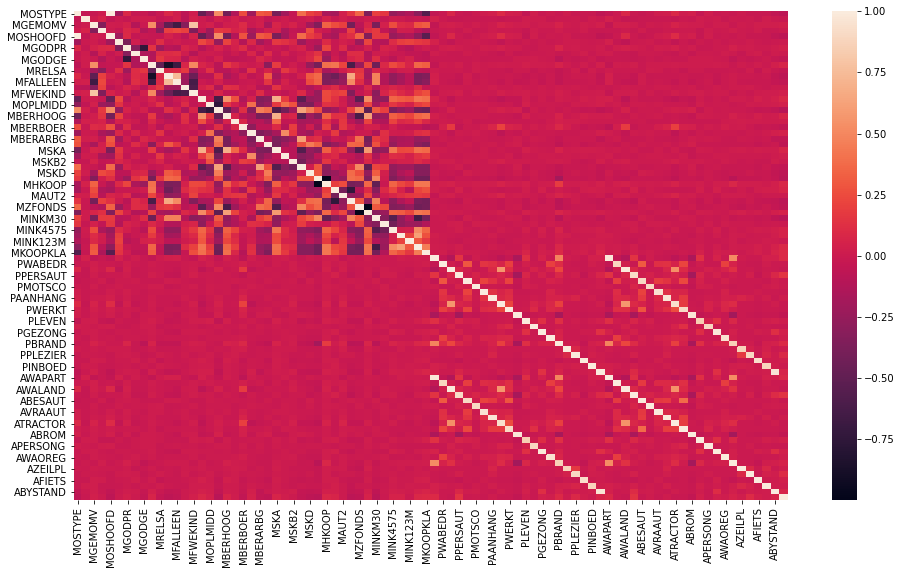

In [44]:
plt.figure(figsize=(16,9))
sns.heatmap(train_df.corr())

# Data

In [9]:
x_train = train_df.drop(['CARAVAN'], axis=1)
y_train = train_df['CARAVAN']

x_test = test_df
y_test = targets_df

# Baseline Model

In [33]:
rf = RandomForestClassifier()

rf_trained = rf.fit(x_train , y_train)
x_pred = rf_trained.predict(x_test)

In [34]:
print(accuracy_score(y_test , x_pred))
print(classification_report(y_test , x_pred))

0.93375
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3762
           1       0.27      0.07      0.11       238

    accuracy                           0.93      4000
   macro avg       0.61      0.53      0.54      4000
weighted avg       0.90      0.93      0.91      4000



In [39]:
rf = RandomForestClassifier(class_weight='balanced')

parameters = {"max_depth": [1,2,3,6],
              "max_features": [1, 3,5],
              "min_samples_split": [2, 3, 10],
                "min_samples_leaf": [1, 3, 10],
                "bootstrap": [False],
                "n_estimators" :[10, 50, 100],
                "criterion": ["gini"]}

model_tunning = GridSearchCV(rf, param_grid=parameters, cv = 3, scoring='f1_weighted', n_jobs = 4, verbose = 1)

rf_tune=model_tunning.fit(x_train , y_train)

rf_best_feat = rf_tune.best_estimator_

print(model_tunning.best_score_)
print(model_tunning.best_params_)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
0.8447643097915484
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


In [40]:
x_pred = rf_best_feat.predict(x_test)
print(accuracy_score(y_test , x_pred))
print(classification_report(y_test , x_pred))

0.7735
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      3762
           1       0.14      0.52      0.21       238

    accuracy                           0.77      4000
   macro avg       0.55      0.66      0.54      4000
weighted avg       0.91      0.77      0.83      4000



# XGBClassifier

In [43]:
xgb = XGBClassifier(class_weight = 'balanced')

parameters = {
        'estimator__min_child_weight': [1, 5, 10],
        'estimator__gamma': [0.5, 1, 1.5, 2, 5],
        'estimator__subsample': [0.6, 0.8, 1.0],
        'estimator__colsample_bytree': [0.6, 0.8, 1.0],
        'estimator__max_depth': [3, 4, 5]
        }


model_tunning = GridSearchCV(xgb, param_grid=parameters, cv = 3, 
                             scoring='f1_weighted', n_jobs = 4, verbose = 1)

xgb_tune =model_tunning.fit(x_train , y_train)

xgb_best = xgb_tune.best_estimator_

print(model_tunning.best_score_)
print(model_tunning.best_params_)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[17:34:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "class_weight", "estimator__colsample_bytree", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:34:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "class_weight", "estimator__colsample_bytree", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__subsample" } might not be used.

  This could be a false alarm, with some

In [25]:
x_pred = xgb_best.predict(x_test)
print(accuracy_score(y_test , x_pred))
print(classification_report(y_test , x_pred))

0.935
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3762
           1       0.31      0.08      0.12       238

    accuracy                           0.94      4000
   macro avg       0.63      0.53      0.54      4000
weighted avg       0.91      0.94      0.92      4000

